## Example for ODE and PDE
This is an example for an ODE and PDE, and how they are solved. The ODE is the probably most simplest form of $$ dy/dt = y(t) $$ which is solved by an exponential function.

The next PDE is the heat equation describing how heat diffuses through a given region over time. The differential equation is given by $$ \frac{\delta u}{\delta t} = \alpha^2\frac{\delta^2 u}{\delta x^2} $$ which is solved by $$ u(x, t) = e^{-\alpha k^2 t} \sin\left(k\cdot x\right) $$


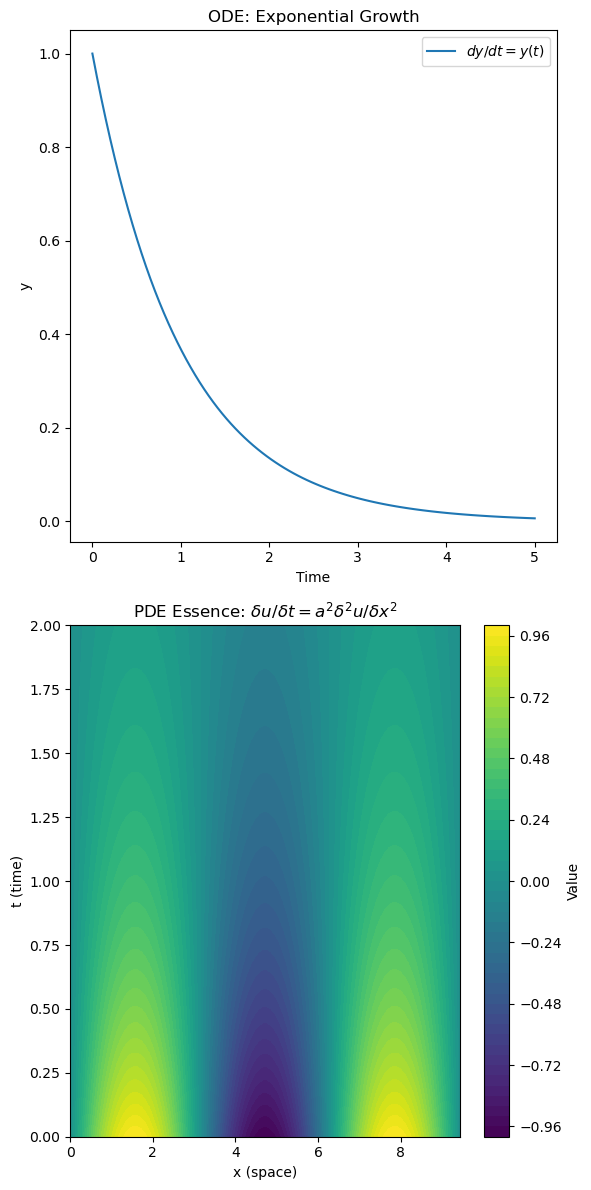

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the ODE
def exponential_growth(t, y): return (-y)

# Solve the ODE
solution = solve_ivp(exponential_growth, [0, 5], [1], dense_output=True)

# Time points where we evaluate the solution
t_plot = np.linspace(0, 5, 100)
y_plot = solution.sol(t_plot)

# Re-defining "PDE" variables for plotting
x = np.linspace(0, 3*np.pi, 100)
t = np.linspace(0, 2, 100)
X, T = np.meshgrid(x, t)
#Z = np.sin(X) * np.exp(-T)
alpha = 1.0
k = 1.0
Z = np.exp(-alpha * k**2 * T) * np.sin(k * X)

# Re-plotting with corrections
plt.figure(figsize=(6, 12))

# ODE plot
plt.subplot(2, 1, 1)
plt.plot(t_plot, y_plot[0], label=r'$dy/dt = y(t)$')
plt.title("ODE: Exponential Growth")
plt.xlabel("Time")
plt.ylabel("y")
plt.legend()

# "PDE" plot with corrected essence in 2D
plt.subplot(2, 1, 2)
plt.contourf(X, T, Z, levels=50, cmap='viridis')
plt.title("PDE Essence: $\delta u/\delta t = a^2 \delta^2 u/\delta x^2 $")
plt.xlabel("x (space)")
plt.ylabel("t (time)")
plt.colorbar(label='Value')

plt.tight_layout()
plt.savefig("Example_ODE_PDE.png")
plt.show()




## Example for Laplace transform
Example of using the Laplace transform to describe a contiuous time system. In this case, the transfer function is given by $$ H(s) = \frac{1}{R + L\cdot s}. $$ The output is given by
$$ I(s) = H(s)\cdot V_{in}(s). $$ In our case, a step function is used as input to the system.

For the output voltage, the transform function is given by $$ H(s) = \frac{L\cdot s}{R + L\cdot s} $$ and the ouput is given by $$ V_{out} = H(s)\cdot V_{in} $$.

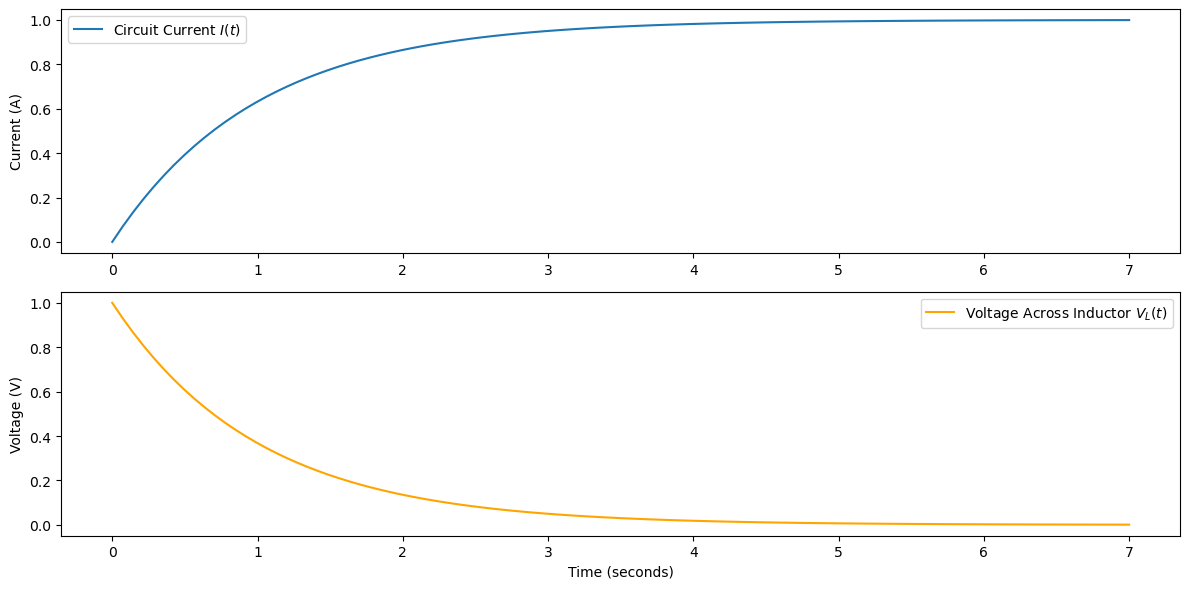

In [29]:
from scipy.signal import TransferFunction, step
import numpy as np
import matplotlib.pyplot as plt

# System parameters
R = 1  # Resistance in ohms
L = 1  # Inductance in henries

# Define the transfer function for the RL circuit (I(s) / V_in(s) = 1 / (R + Ls))
system = TransferFunction([1], [L, R])

# Compute the step response of the system
t, I = step(system)

# Define the transfer function for the output voltage
system = TransferFunction([L, 0], [L, R])

# Compute the voltage across the inductor V_L = L * dI/dt
# Determine output voltage
t, V_L = step(system)

# Using np.diff to approximate the derivative, adjust the difference array size for plotting
# V_L = np.diff(I, prepend=I[0]) / np.diff(t, prepend=t[0]) * L

# Plotting
plt.figure(figsize=(12, 6))

# Plot the current response (I(t))
plt.subplot(2, 1, 1)
plt.plot(t, I, label='Circuit Current $I(t)$')
plt.ylabel('Current (A)')
plt.legend()

# Plot the voltage across the inductor (V_L(t))
plt.subplot(2, 1, 2)
plt.plot(t, V_L, label='Voltage Across Inductor $V_{L}(t)$', color='orange')
plt.xlabel('Time (seconds)')
plt.ylabel('Voltage (V)')
plt.legend()

plt.tight_layout()
plt.show()


## Example of oscillator
A typical oscillator equation is given by $$ \frac{d^2x}{dt^2} + \omega^2 x = 0$$
which can be reformulated to

* $dx/dt = v$
* $dv/dt = -\omega^2 t$

which is solved in the following using scipy.integrate.

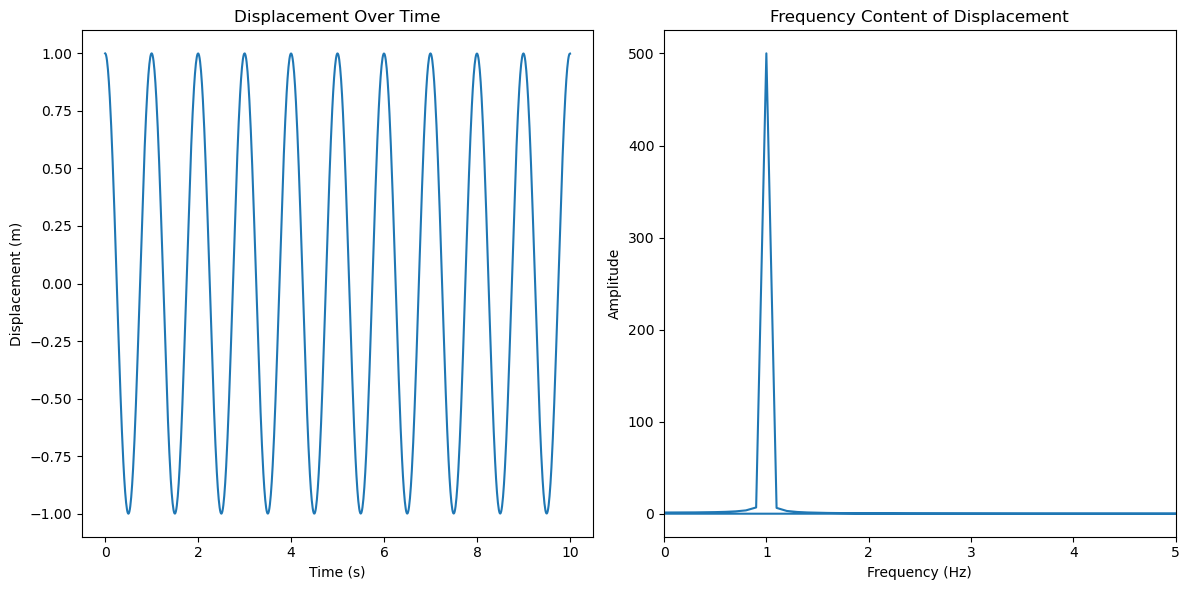

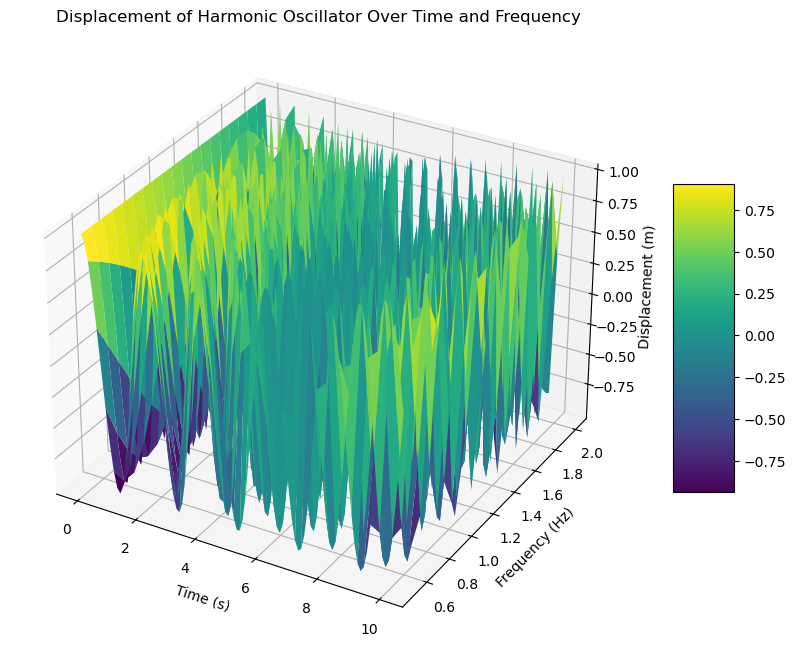

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from scipy.integrate import solve_ivp
from scipy.fft import fft, fftfreq
import numpy as np
import matplotlib.pyplot as plt

# System of ODEs for the oscillator
def oscillator(t, y, omega):
    x, v = y
    dxdt = v
    dvdt = -omega**2 * x
    return [dxdt, dvdt]

# Natural angular frequency
omega = 2 * np.pi  # 1 Hz

# Initial conditions and time span
y0 = [1, 0]
t_span = (0, 10)
t_eval = np.linspace(*t_span, 1000)

# Solve the ODE
sol = solve_ivp(oscillator, t_span, y0, args=(omega,), t_eval=t_eval)

# Perform a Fourier transform on the displacement
yf = fft(sol.y[0])
xf = fftfreq(n=len(t_eval), d=t_eval[1]-t_eval[0])

# Plotting
plt.figure(figsize=(12, 6))

# Displacement over time
plt.subplot(1, 2, 1)
plt.plot(sol.t, sol.y[0])
plt.title('Displacement Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Displacement (m)')

# Frequency content
plt.subplot(1, 2, 2)
plt.plot(xf, np.abs(yf))
plt.title('Frequency Content of Displacement')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.xlim(0, 5)  # Limit x-axis to show relevant frequencies

plt.tight_layout()
plt.show()

##
## Second plot showing a mesh
t_eval = np.linspace(*t_span, 100)  # Time points at which to solve

# Frequency range (e.g., from 0.5 Hz to 2 Hz)
frequencies = np.linspace(0.5, 2, 20)  # 20 frequency values as an example
omegas = 2 * np.pi * frequencies  # Convert frequencies to angular frequencies

# Initialize the displacement array
displacement = np.zeros((len(t_eval), len(omegas)))

# Loop over frequencies to calculate displacement
for i, omega in enumerate(omegas):
    # Define the system of ODEs for each omega
    def oscillator(t, y):
        x, v = y
        dxdt = v
        dvdt = -omega**2 * x
        return [dxdt, dvdt]
    
    # Solve the ODE
    sol = solve_ivp(oscillator, t_span, y0, t_eval=t_eval)
    displacement[:, i] = sol.y[0]

# Create a mesh grid for plotting
T, F = np.meshgrid(t_eval, frequencies)

# Plotting
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot as a mesh
surf = ax.plot_surface(T, F, displacement.T, cmap='viridis', edgecolor='none')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Frequency (Hz)')
ax.set_zlabel('Displacement (m)')
ax.set_title('Displacement of Harmonic Oscillator Over Time and Frequency')
fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)  # Add a color bar which maps values to colors.

plt.show()


## Example for an RLC circuit (similar to the Simulink example shown in the lecture)

In [38]:
import numpy as np 
from scipy.integrate import odeint 
import matplotlib.pyplot as plt 

In [39]:
# Step 2: Define the differential equation
def dX_dt(X, t, R, L, C, E_function):
    x1, x2 = X
    dx1dt = x2
    dx2dt = -(R/L)*x2 - (1/(L*C))*x1 + E_function(t)/L
    return [dx1dt, dx2dt]

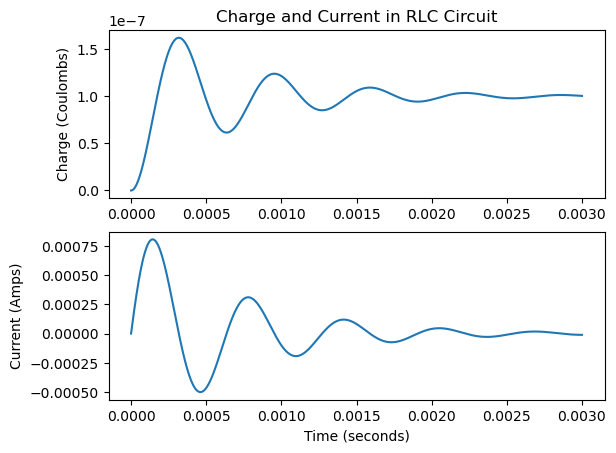

In [43]:
# Parameters
R = 300.0  # Resistance in ohms
L = 100 * 10**-3 # 0.1  # Inductance in henrys
C = 100 * 10**-9 # 0.001  # Capacitance in farads

# External voltage as a function of time
def E(t):
    return 1; # return np.sin(2 * np.pi * t)  # Example: Sinusoidal input

# Initial conditions: q(0) = 0 (initial charge), dq/dt(0) = 0 (initial current)
X0 = [0, 0]

# Time points to solve for
t = np.linspace(0, 0.003, 1000)  # From 0 to 10 seconds, 1000 points

# Step 3: Solve the differential equation
solution = odeint(dX_dt, X0, t, args=(R, L, C, E))

# Step 4: Plot the results
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(t, solution[:, 0])
plt.title('Charge and Current in RLC Circuit')
plt.ylabel('Charge (Coulombs)')

plt.subplot(2, 1, 2)
plt.plot(t, solution[:, 1])
plt.xlabel('Time (seconds)')
plt.ylabel('Current (Amps)')
plt.savefig("Example_RLC_cicuit.png")
plt.show()

## Example for the scalability of numerical solutions

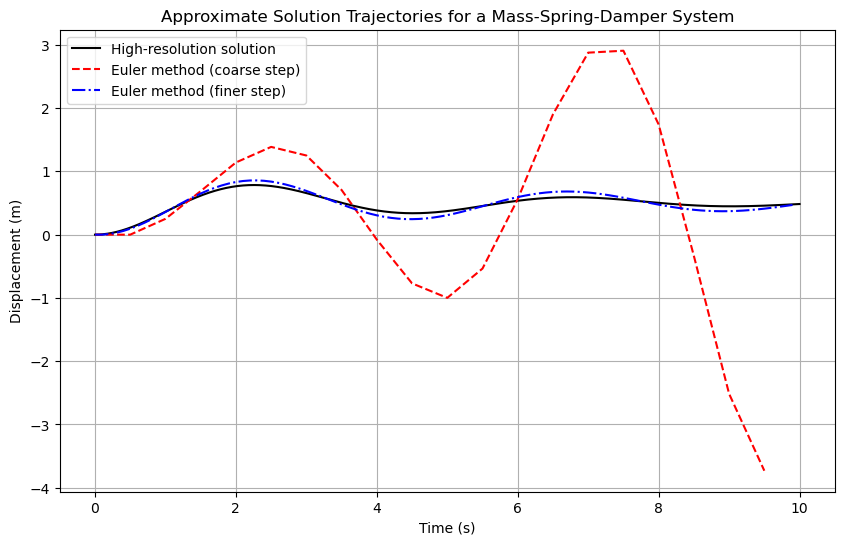

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# System parameters
m = 1.0  # Mass (kg)
d = 0.5  # Damping coefficient (Ns/m)
k = 2.0  # Spring constant (N/m)
F0 = 1.0  # Constant external force (N)

# Time span
t_start = 0
t_end = 10
t_fine = np.linspace(t_start, t_end, 1000)

# Euler's method for approximate solution (coarse and finer)
def euler_method(h):
    times = np.arange(t_start, t_end, h)
    x = np.zeros(times.shape)
    v = np.zeros(times.shape)
    for i in range(1, len(times)):
        v[i] = v[i-1] + h * (-d/m * v[i-1] - k/m * x[i-1] + F0/m)
        x[i] = x[i-1] + h * v[i-1]
    return times, x

# Actual solution using solve_ivp (high resolution)
def system_ode(t, y):
    return [y[1], -d/m * y[1] - k/m * y[0] + F0/m]

sol = solve_ivp(system_ode, [t_start, t_end], [0, 0], t_eval=t_fine)

# Approximate solutions with different step sizes
t_coarse, x_coarse = euler_method(0.5)
t_finer, x_finer = euler_method(0.1)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(sol.t, sol.y[0], 'k', label='High-resolution solution')
plt.plot(t_coarse, x_coarse, 'r--', label='Euler method (coarse step)')
plt.plot(t_finer, x_finer, 'b-.', label='Euler method (finer step)')
plt.xlabel('Time (s)')
plt.ylabel('Displacement (m)')
plt.title('Approximate Solution Trajectories for a Mass-Spring-Damper System')
plt.legend()
plt.grid(True)
plt.savefig("Example approximate solution Euler method.png")
plt.show()


## Example for initial value problem

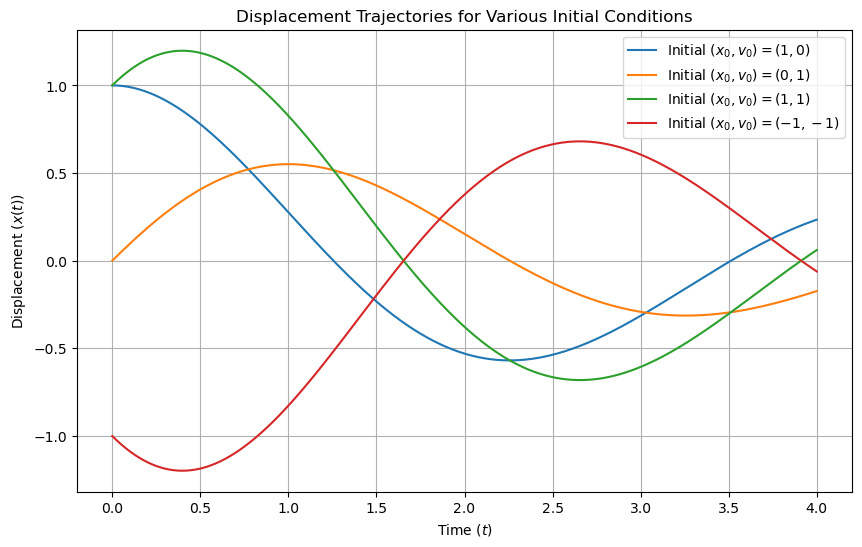

In [2]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the mass-spring-damper system
m = 1.0  # Mass (kg)
d = 0.5  # Damping coefficient (Ns/m)
k = 2  # Spring constant (N/m)

# System's differential equation
def msd_system(t, y):
    x, v = y
    dxdt = v
    dvdt = -(d/m)*v - (k/m)*x
    return [dxdt, dvdt]

# Time span for the solution
t_span = [0, 4]
t = np.linspace(*t_span, 1000)

# Various initial conditions: [(x(0), dx/dt(0))]
initial_conditions = [
    (1, 0),  # Initial displacement 1, initial velocity 0
    (0, 1),  # Initial displacement 0, initial velocity 1
    (1, 1),  # Initial displacement 1, initial velocity 1
    (-1, -1) # Initial displacement -1, initial velocity -1
]

# Plot the solutions
plt.figure(figsize=(10, 6))
for x0, v0 in initial_conditions:
    sol = solve_ivp(msd_system, t_span, [x0, v0], t_eval=t)
    plt.plot(sol.t, sol.y[0], label=f'Initial $(x_0, v_0) = ({x0}, {v0})$')

plt.xlabel('Time ($t$)')
plt.ylabel('Displacement ($x(t)$)')
plt.title('Displacement Trajectories for Various Initial Conditions')
plt.legend()
plt.grid(True)
plt.savefig("Example initial value problem.png")
plt.show()


Euler method

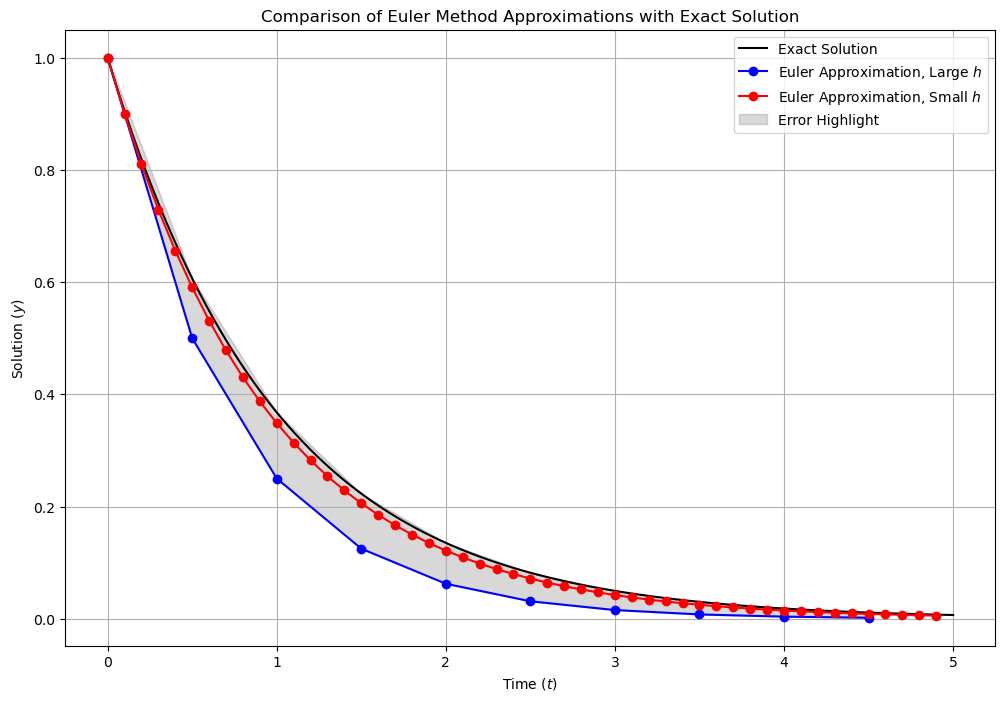

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
k = 1  # Rate parameter
y0 = 1  # Initial condition

# Exact solution function
def exact_solution(t):
    return y0 * np.exp(-k * t)

# Euler's method function
def euler_method(y0, t, h):
    y = np.zeros(len(t))
    y[0] = y0
    for i in range(1, len(t)):
        y[i] = y[i-1] - k * y[i-1] * h
    return y

# Time domain
t_max = 5
t = np.linspace(0, t_max, 1000)
t_coarse = np.arange(0, t_max, 0.5)
t_fine = np.arange(0, t_max, 0.1)

# Exact solution
y_exact = exact_solution(t)

# Euler approximations
y_euler_coarse = euler_method(y0, t_coarse, 0.5)
y_euler_fine = euler_method(y0, t_fine, 0.1)

# Plotting
plt.figure(figsize=(12, 8))

# Exact solution curve
plt.plot(t, y_exact, 'k', label='Exact Solution')

# Euler approximations
plt.plot(t_coarse, y_euler_coarse, 'b-o', label='Euler Approximation, Large $h$', markevery=1)
plt.plot(t_fine, y_euler_fine, 'r-o', label='Euler Approximation, Small $h$', markevery=1)

# Error indication (zoomed in on a section)
plt.fill_between(t_coarse, y_euler_coarse, exact_solution(t_coarse), color='gray', alpha=0.3, label='Error Highlight')

plt.xlabel('Time ($t$)')
plt.ylabel('Solution ($y$)')
plt.title('Comparison of Euler Method Approximations with Exact Solution')
plt.legend()
plt.grid(True)
plt.savefig("Euler method in detail.png")
plt.show()


## Example for Runge Kutta method

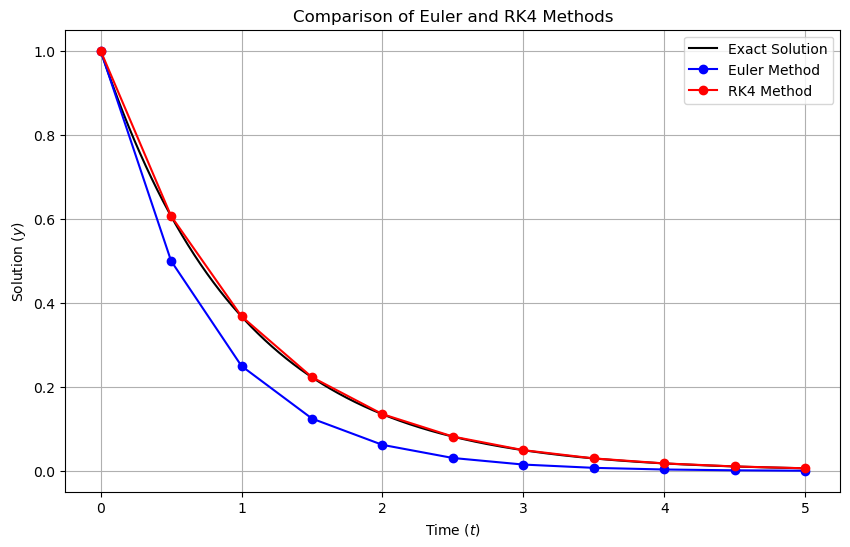

In [59]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
k = 1.0  # Rate constant
y0 = 1.0  # Initial condition
t_end = 5.0  # End of the time interval
n_euler = 10  # Number of steps for Euler
n_rk4 = 10  # Number of steps for RK4 (constant step size for comparison)

# Exact solution
t_exact = np.linspace(0, t_end, 1000)
y_exact = np.exp(-k * t_exact)

# Euler method implementation
def euler(y0, k, t_end, n_steps):
    t = np.linspace(0, t_end, n_steps + 1)
    y = np.zeros(n_steps + 1)
    y[0] = y0
    h = t[1] - t[0]
    for i in range(n_steps):
        y[i + 1] = y[i] - k * y[i] * h
    return t, y

# RK4 method implementation
def rk4(y0, k, t_end, n_steps):
    t = np.linspace(0, t_end, n_steps + 1)
    y = np.zeros(n_steps + 1)
    y[0] = y0
    h = t[1] - t[0]
    for i in range(n_steps):
        f1 = -k * y[i]
        f2 = -k * (y[i] + f1 * h / 2)
        f3 = -k * (y[i] + f2 * h / 2)
        f4 = -k * (y[i] + f3 * h)
        y[i + 1] = y[i] + (h / 6) * (f1 + 2*f2 + 2*f3 + f4)
    return t, y

# Calculate solutions
t_euler, y_euler = euler(y0, k, t_end, n_euler)
t_rk4, y_rk4 = rk4(y0, k, t_end, n_rk4)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(t_exact, y_exact, 'k', label='Exact Solution')
plt.plot(t_euler, y_euler, 'bo-', label='Euler Method')
plt.plot(t_rk4, y_rk4, 'ro-', label='RK4 Method')

plt.xlabel('Time ($t$)')
plt.ylabel('Solution ($y$)')
plt.title('Comparison of Euler and RK4 Methods')
plt.legend()
plt.grid(True)
plt.savefig("Example runge kutta method.png")
plt.show()


## Example for using a Linear Multistep method (Adams-Bashforth 2-step)

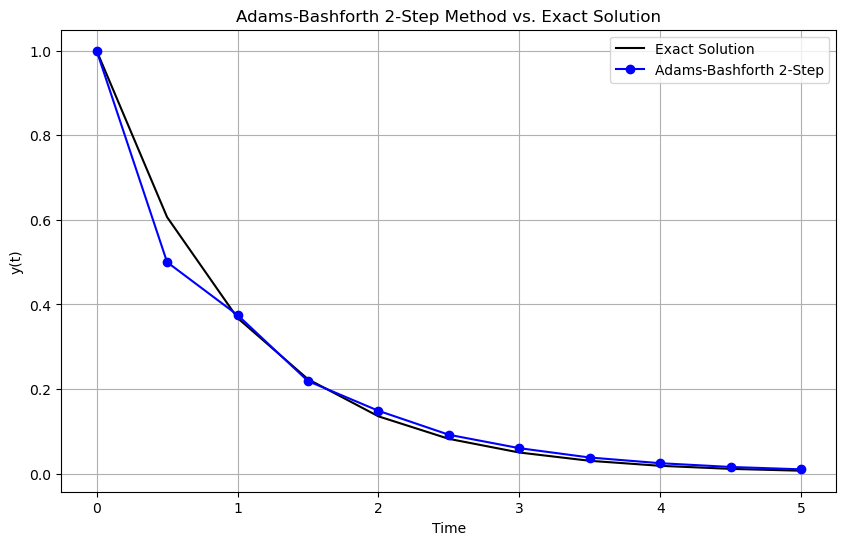

In [64]:
import numpy as np
import matplotlib.pyplot as plt

# ODE definition
k = 1.0
def f(t, y):
    return -k * y

# Exact solution for comparison
def exact_solution(t):
    return np.exp(-k * t)

# Initial conditions
t0, y0 = 0, 1
tf = 5  # Final time
N = 10  # Number of steps
h = (tf - t0) / N  # Step size

# Time points
t = np.linspace(t0, tf, N+1)

# Initialize the solution array
y = np.zeros(N+1)
y[0] = y0

# Start-up using Euler's method for the first step
y[1] = y[0] + h * f(t[0], y[0])

# Adams-Bashforth 2-step method
for n in range(1, N):
    y[n+1] = y[n] + h * ((3/2) * f(t[n], y[n]) - (1/2) * f(t[n-1], y[n-1]))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(t, exact_solution(t), 'k-', label='Exact Solution')
plt.plot(t, y, 'bo-', label='Adams-Bashforth 2-Step')
plt.xlabel('Time')
plt.ylabel('y(t)')
plt.title('Adams-Bashforth 2-Step Method vs. Exact Solution')
plt.legend()
plt.grid(True)
plt.savefig("Example linear multistep method.png")
plt.show()


## Example for stability and discontinuity
Modify the time step constant to see the effects of instability

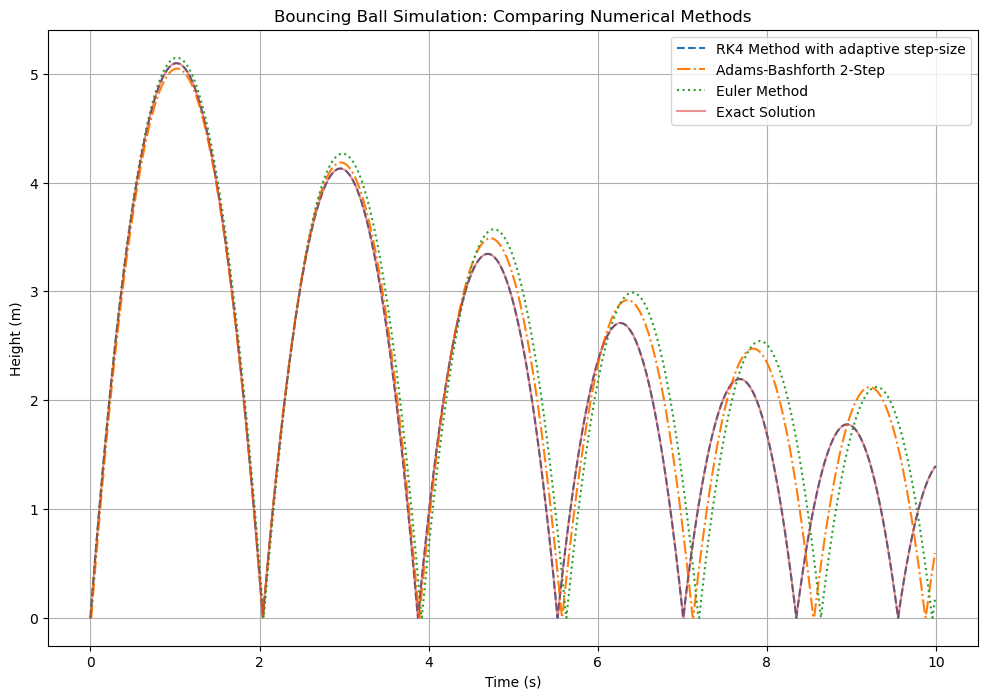

In [128]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants
g = 9.81  # Gravity (m/s^2)
e = 0.9  # Coefficient of restitution
v0 = 10  # Initial velocity upwards (m/s)
tf = 10  # Time to simulate (s)
dt = 0.01  # Time step

# Time array
t = np.arange(0, tf, dt)

# Initialize arrays for each method
y_rk4 = np.zeros(len(t))
v_rk4 = np.zeros(len(t))
y_rk4[0], v_rk4[0] = 0, v0

y_ab2 = np.zeros(len(t))
v_ab2 = np.zeros(len(t))
y_ab2[0], v_ab2[0] = 0, v0

y_euler = np.zeros(len(t))
v_euler = np.zeros(len(t))
y_euler[0], v_euler[0] = 0, v0

# Function for the acceleration (gravity only, negative sign for downward force)
def acceleration(v):
    return -g

#
# Euler method
#
for i in range(1, len(t)):
    v_euler[i] = v_euler[i-1] + dt * acceleration(v_euler[i-1])
    y_euler[i] = y_euler[i-1] + dt * v_euler[i-1]
    if y_euler[i] < 0:  # Bounce condition
        y_euler[i] = 0
        v_euler[i] = -e * v_euler[i]

#
# RK4 method for velocity (position update using velocity from previous step)
#
for i in range(1, len(t)):
    k1 = acceleration(v_rk4[i-1])
    k2 = acceleration(v_rk4[i-1] + 0.5 * dt * k1)
    k3 = acceleration(v_rk4[i-1] + 0.5 * dt * k2)
    k4 = acceleration(v_rk4[i-1] + dt * k3)
    v_rk4[i] = v_rk4[i-1] + (dt / 6) * (k1 + 2*k2 + 2*k3 + k4)
    y_rk4[i] = y_rk4[i-1] + dt * v_rk4[i-1]
    if y_rk4[i] < 0:  # Bounce condition
        y_rk4[i] = 0
        v_rk4[i] = -e * v_rk4[i]
        
#
# Adams-Bashforth 2-step method (requires starting method like Euler for the first step)
#
v_ab2[1] = v_ab2[0] + dt * acceleration(v_ab2[0])  # Start with Euler for the first step
for i in range(2, len(t)):
    v_ab2[i] = v_ab2[i-1] + dt * (1.5 * acceleration(v_ab2[i-1]) - 0.5 * acceleration(v_ab2[i-2]))
    y_ab2[i] = y_ab2[i-1] + dt * v_ab2[i-1]
    if y_ab2[i] < 0:  # Bounce condition
        y_ab2[i] = 0
        v_ab2[i] = -e * v_ab2[i]

#
# RK4 with adaptive step-size
#
# The ODE system (second-order ODE represented as a system of first-order ODEs)
def ode_system(t, y):
    return [y[1], -g]

# Event to detect the ball hitting the ground
def hit_ground(t, y):
    return y[0]

hit_ground.terminal = True
hit_ground.direction = -1

# Solving the problem
def solve_bouncing_ball(y0, v0, t_span):
    sol_t = np.array([t_span[0]])
    sol_y = np.array([y0])

    while sol_t[-1] < t_span[1]:
        # Initial conditions for the current segment
        y_init = [y0, v0]

        # Solve until the next bounce
        sol = solve_ivp(ode_system, [sol_t[-1], t_span[1]], y_init, events=hit_ground, dense_output=True, max_step=0.05)

        # Evaluate the solution at a dense set of points to plot
        t_eval_dense = np.linspace(sol.t[0], sol.t[-1], 100)
        y_eval_dense = sol.sol(t_eval_dense)[0]

        # Append the dense evaluation to the overall solution
        sol_t = np.concatenate((sol_t, t_eval_dense))
        sol_y = np.concatenate((sol_y, y_eval_dense))

        # Update initial conditions for the next segment
        y0 = 0  # Reset height to 0
        v0 = -e * sol.y[1][-1]  # Apply the coefficient of restitution to the velocity

        # Break if the ball has nearly stopped
        if abs(v0) < 0.01:
            break

    return sol_t, sol_y

# Initial conditions
y0 = 0      # Initial height (meters)
v0 = 10     # Initial velocity (meters per second upwards)
t_span = [0, tf]  # Time span to solve over

# Solve the bouncing ball problem
sol_t, sol_rk4 = solve_bouncing_ball(y0, v0, t_span)

#
# Exact solution
#
t_last_bounce = 0
t_exact = np.arange(0, tf, 0.01)
y_exact = []
for tk in t_exact:
    y_exact.append(max(0, v0*(tk - t_last_bounce) - 0.5*g*(tk - t_last_bounce)**2))
    if tk - t_last_bounce > 2 * v0 / g:
        t_last_bounce = t_last_bounce + 2*v0 / g
        v0 = e*v0

# Plotting
plt.figure(figsize=(12, 8))
# plt.plot(t, y_rk4, label='RK4 Method', linestyle='--')
plt.plot(sol_t, sol_rk4, label='RK4 Method with adaptive step-size', linestyle='--')
plt.plot(t, y_ab2, label='Adams-Bashforth 2-Step', linestyle='-.')
plt.plot(t, y_euler, label='Euler Method', linestyle=':')
plt.plot(t_exact, y_exact, label='Exact Solution', alpha=0.5)
plt.xlabel('Time (s)')
plt.ylabel('Height (m)')
plt.title('Bouncing Ball Simulation: Comparing Numerical Methods')
plt.legend()
plt.grid(True)
plt.savefig("Example for stability using bouncing ball simulation.png")
plt.show()


## Optimization

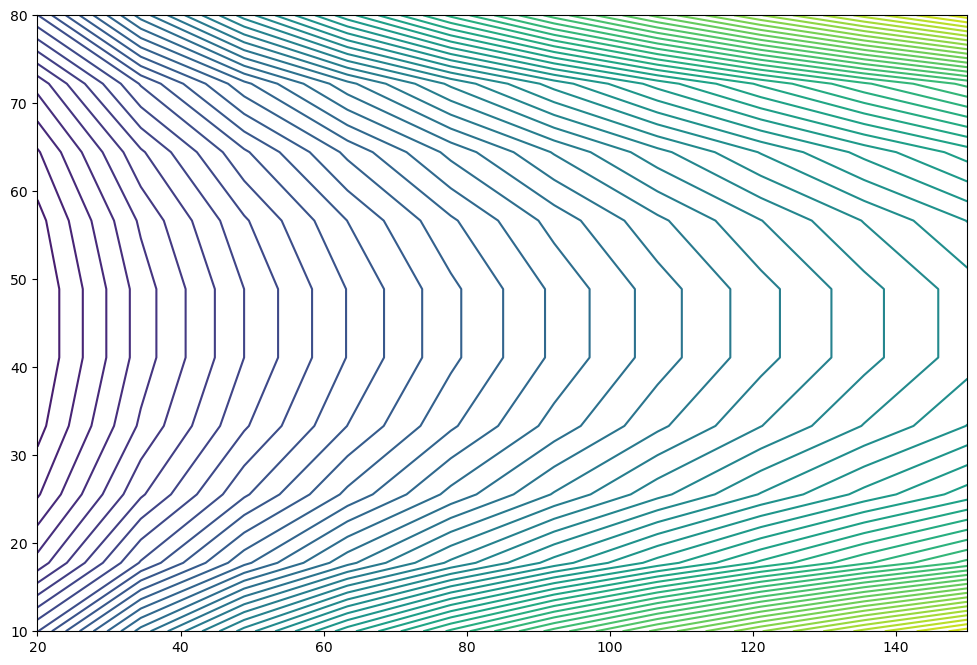

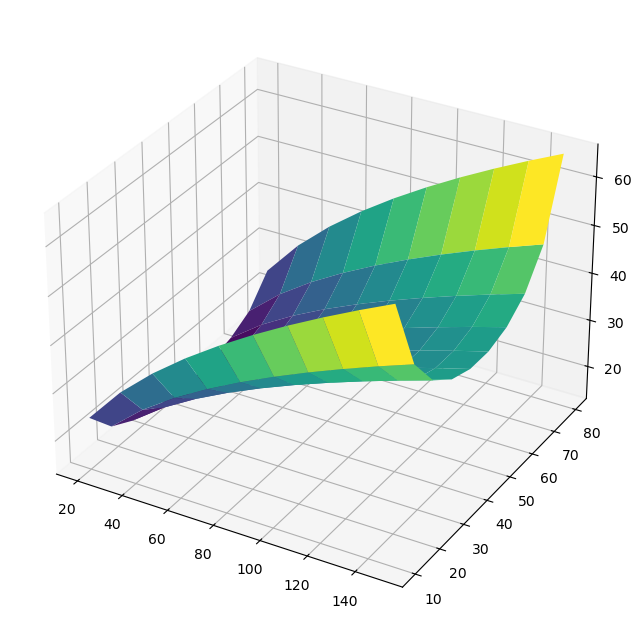

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from mpl_toolkits.mplot3d import Axes3D

# Constants
g = 9.81  # m/s^2, acceleration due to gravity
d_hole = 100  # meters, distance to the hole
angle = 45  # degrees, launch angle

# Objective function: energy E = 0.5 * m * v^2 (m is constant and can be omitted)
def objective(v):
    return 0.5 * v**2

# Constraint: the ball must reach the hole
def constraint_reach_hole(v):
    # Convert angle to radians
    angle_rad = np.radians(angle)        
    # Calculate the horizontal distance covered by the ball
    d = (v**2 * np.sin(2 * angle_rad)) / g    
    return d - d_hole

# Constraint: ensure at least one bounce by requiring a minimum initial speed
def constraint_at_least_one_bounce(v):
    # For simplicity, assume a minimum speed that guarantees at least one bounce before reaching the hole
    min_speed_for_bounce = 2.0  # This is an arbitrary value for demonstration
    return v - min_speed_for_bounce

#
# Optimization over a set of parameters
#
d_array = np.linspace(20, 150, 10)  # Range of distances
angle_array = np.linspace(10, 80, 10)  # Range of angles
D_mg, Angle_mg = np.meshgrid(d_array, angle_array)

# Initial guess for the velocity
v0 = [25]  # A starting guess that's likely above the minimum required for at least one bounce            
Energy = np.zeros(D_mg.shape)

for iy, ix in np.ndindex(D_mg.shape):
    angle = Angle_mg[iy, ix]
    d_hole = D_mg[iy, ix]  
    
    # Constraints in a form suitable for scipy.optimize.minimize
    constraints = [{'type': 'eq', 'fun': constraint_reach_hole},
               {'type': 'ineq', 'fun': constraint_at_least_one_bounce}]    

    # Perform the optimization
    result = minimize(objective, v0, method='SLSQP', constraints=constraints)

    if result.success:
        optimized_velocity = result.x[0]
        optimized_energy = objective(optimized_velocity)
        #print(f"Optimized velocity: {optimized_velocity:.2f} m/s")
        #print(f"Minimum energy required: {optimized_energy:.2f} Joules")
        Energy[iy, ix] = optimized_velocity
    else:
        print("Optimization was not successful.")
        Energy[iy, ix] = -1     

fig = plt.figure(figsize=(12, 8))
plt.contour(D_mg, Angle_mg, Energy, levels=np.arange(10, 70, 1))
plt.show()

# Plotting
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(D_mg, Angle_mg, Energy, cmap='viridis', edgecolor='none')

## Optimization problem for the mass-damper-spring system

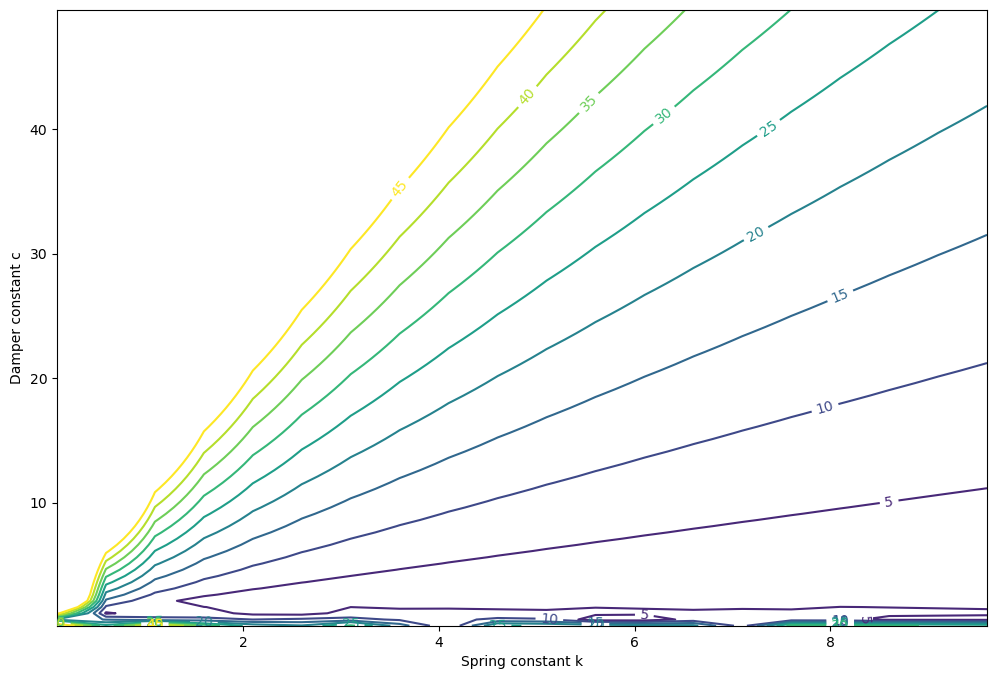

Optimized spring constant (k): 10.00, damping coefficient (c): 4.85
Minimum settling time: 1.15 seconds


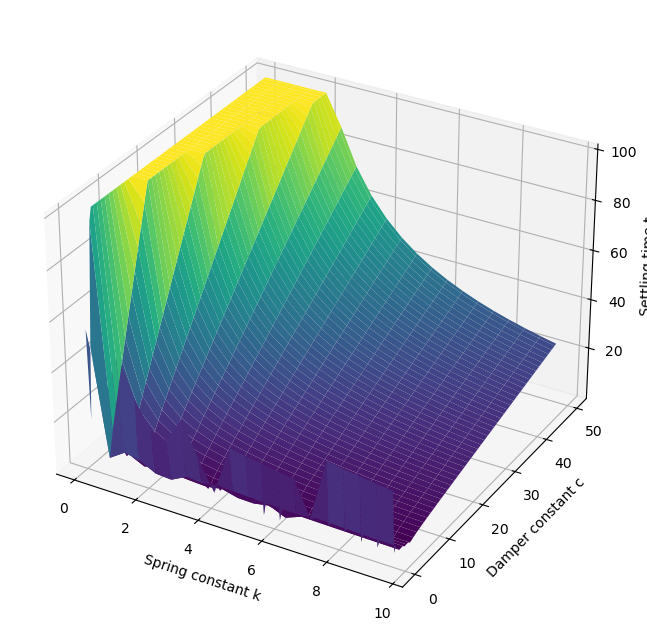

In [72]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import minimize

# Constants
m = 1.0  # Mass of the object in kg
x0, v0 = 1.0, 0.0  # Initial conditions: displacement and velocity
epsilon = 0.01  # Tolerance for settling (near equilibrium position)
time_span = [0, 100]  # Max time for simulation

# System dynamics function
def system_dynamics(t, y, k, c):
    x, v = y
    dxdt = v
    dvdt = -(c/m) * v - (k/m) * x
    return [dxdt, dvdt]

# Function to calculate the settling time for given k and c
def settling_time(k, c):
    def event(t, y, k, c):  # Event function to stop integration when condition is met
        return np.abs(y[0]) - epsilon
    event.terminal = True
    event.direction = 0  # Trigger event regardless of direction
    
    sol = solve_ivp(system_dynamics, time_span, [x0, v0], args=(k, c), events=event, dense_output=True)
    
    if sol.t_events[0].size > 0:  # Check if the event was triggered
        return sol.t_events[0][0]  # Return time of the event (settling time)
    else:
        return time_span[1]  # Return max time if event not triggered

# Objective function for minimization
def objective(x):
    k, c = x
    return settling_time(k, c)

# Initial guess for optimization
y0 = [50, 5]  # Initial guess for k and c

#
# Draw a 3D Plot
#
k, c = np.meshgrid(np.arange(0.1, 10, 0.5), np.arange(0.1, 50, 0.5))
t = np.zeros(k.shape)
for iy, ix in np.ndindex(k.shape):       
    t[iy, ix] = settling_time(k[iy, ix], c[iy, ix])

fig = plt.figure(figsize=(12, 8))
CS = plt.contour(k, c, t, levels=np.arange(0, 50, 5))
plt.gca().set_xlabel("Spring constant k")
plt.gca().set_ylabel("Damper constant c")
plt.gca().clabel(CS, inline=True, fontsize=10)
plt.savefig("Optimization mass-damper-spring.png")
plt.show()

# Plotting
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(k, c, t, cmap='viridis', edgecolor='none')
ax.set_xlabel("Spring constant k")
ax.set_ylabel("Damper constant c")
ax.set_zlabel("Settling time t")

# Bounds for k and c
bounds = [(0.1, 10), (0.1, 50)]  # Bounds for k and c

# Perform optimization
result = minimize(objective, y0, bounds=bounds, method='SLSQP')

if result.success:
    optimized_k, optimized_c = result.x
    optimized_ts = result.fun
    print(f"Optimized spring constant (k): {optimized_k:.2f}, damping coefficient (c): {optimized_c:.2f}")
    print(f"Minimum settling time: {optimized_ts:.2f} seconds")
else:
    print("Optimization was not successful:", result.message)


## Different optimization algorithms

In [83]:
%matplotlib ipympl

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def objective_function(x, y):
    return np.sin(x) * np.cos(y) + np.sin(2*x) * np.cos(2*y) / 2

x = np.linspace(-3, 3, 400)
y = np.linspace(-3, 3, 400)
X, Y = np.meshgrid(x, y)
Z = objective_function(X, Y)


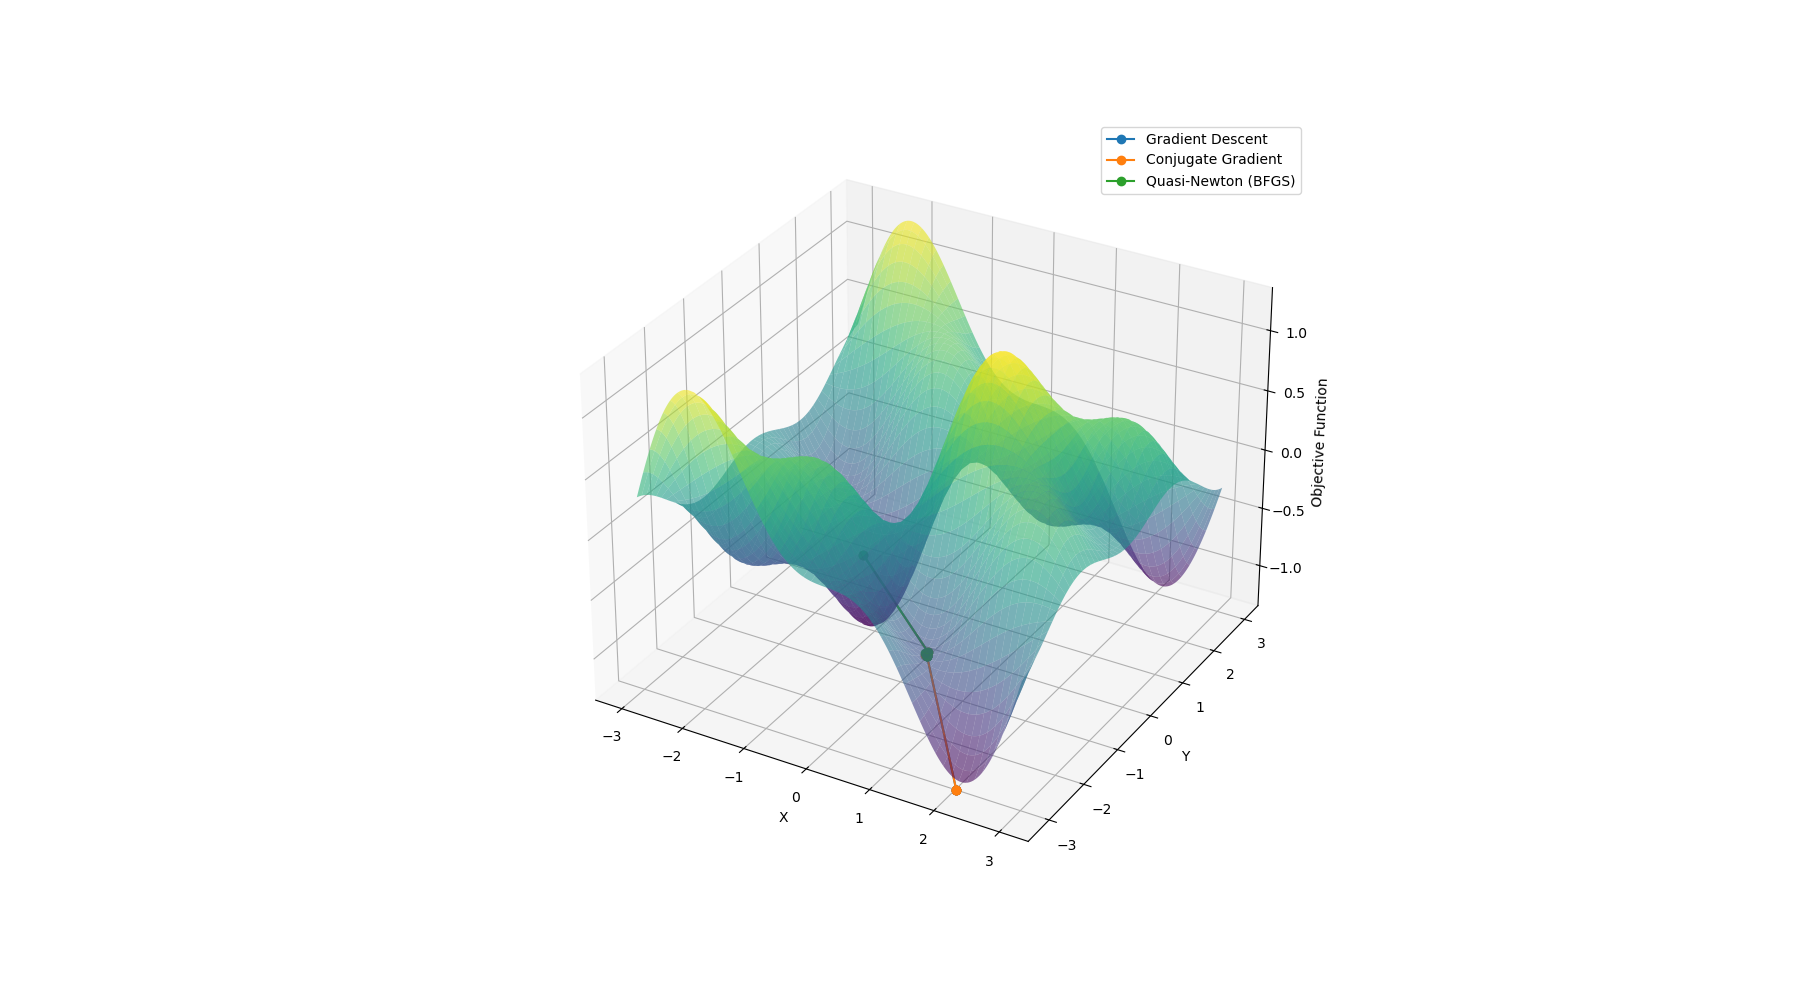

In [89]:
from scipy.optimize import minimize

# Starting point
x0 = np.array([0, -2])

# Path tracing function
def trace_path(method):
    path = [x0]
    def callback(xk):
        path.append(xk)
    res = minimize(lambda x: objective_function(x[0], x[1]), x0, method=method, callback=callback)
    return np.array(path)

# Trace paths for different algorithms
paths = {
    'Gradient Descent': trace_path('CG'),  # Conjugate Gradient as a proxy
    'Conjugate Gradient': trace_path('CG'),
    'Quasi-Newton (BFGS)': trace_path('BFGS'),
    # Newton's method requires a Jacobian, so it's more complex to implement here
}

# Plot the landscape
fig = plt.figure(figsize=(18, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6, antialiased=True)

# Plot paths
for method, path in paths.items():
    ax.plot(path[:, 0], path[:, 1], objective_function(path[:, 0], path[:, 1]), label=method, marker='o')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Objective Function')
ax.legend()
plt.show()


## Sensitivity analysis based on Lotka-Volterra model

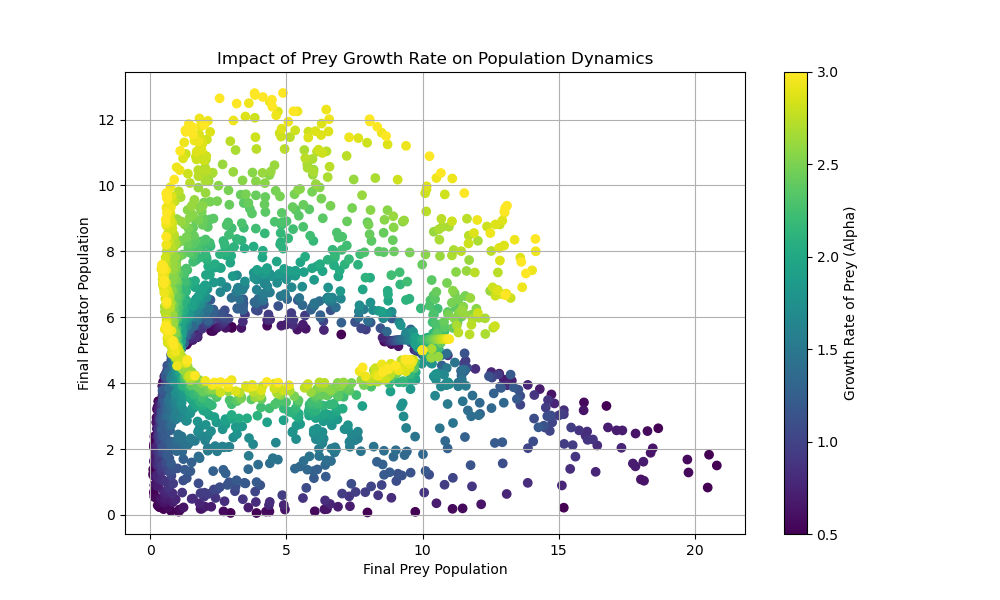

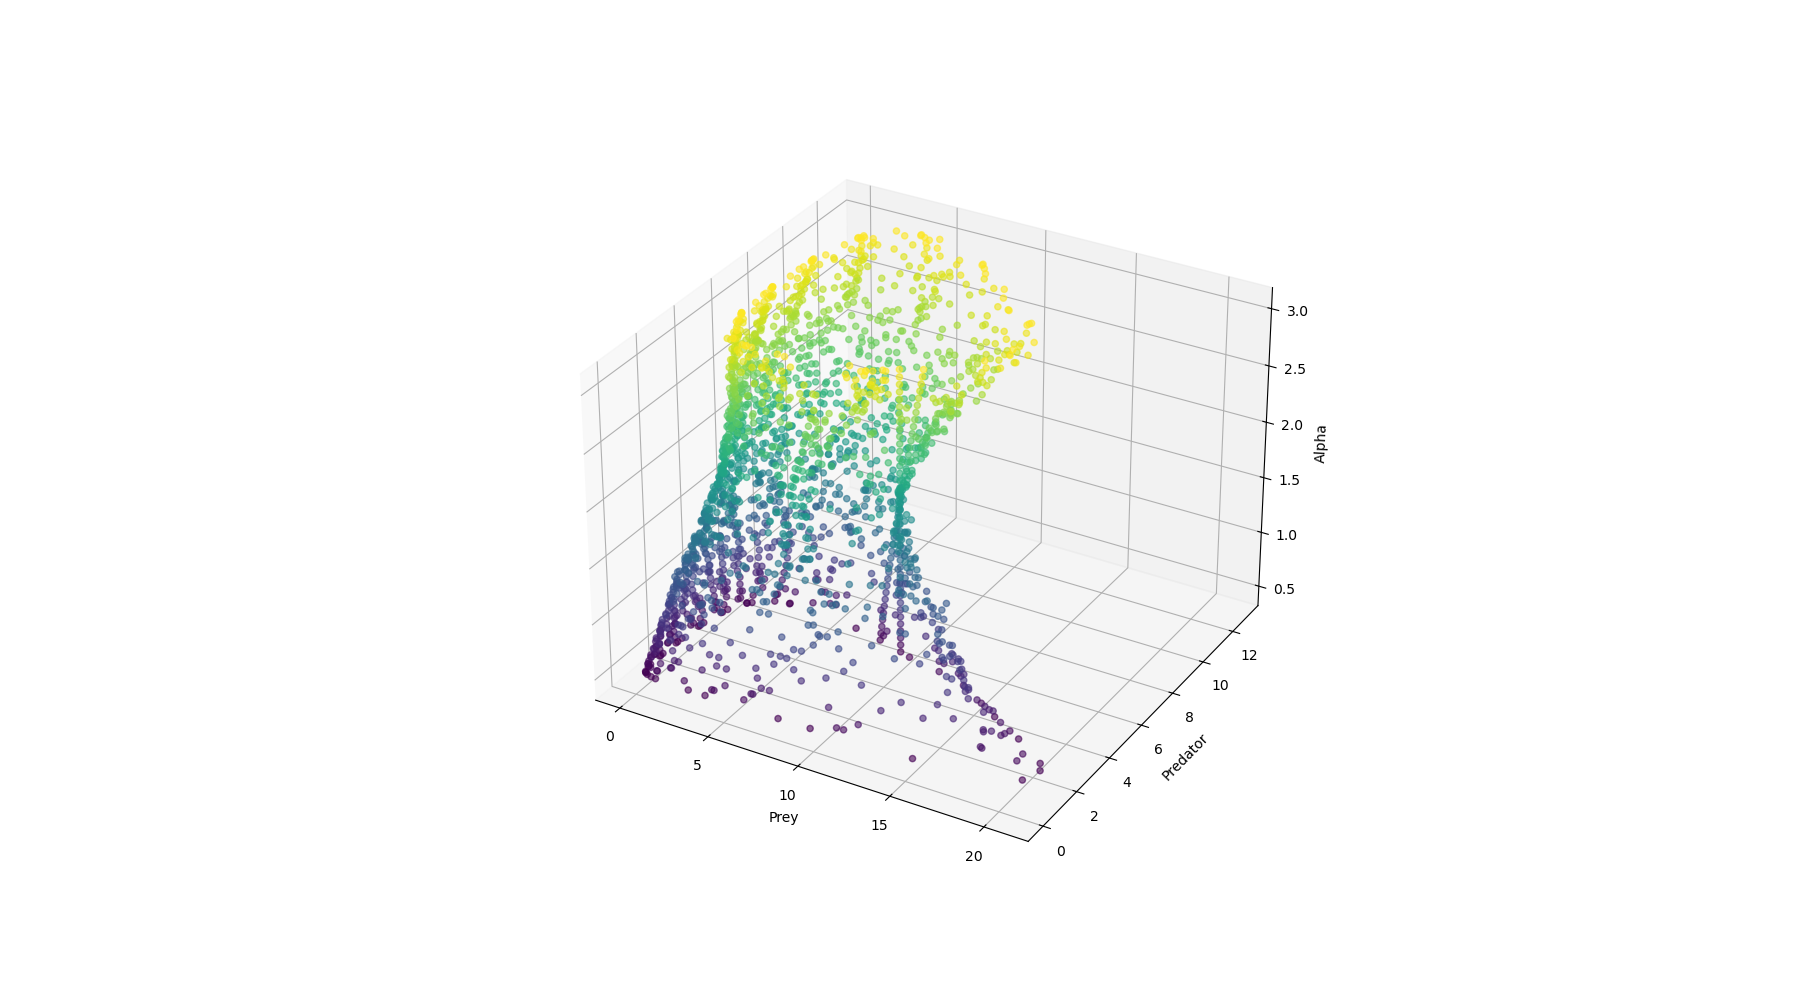

In [117]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the Lotka-Volterra model
def lotka_volterra(t, z, alpha, beta, delta, gamma):
    x, y = z
    dxdt = alpha * x - beta * x * y
    dydt = delta * x * y - gamma * y
    return [dxdt, dydt]

# Initial conditions
x0, y0 = 10, 5  # Initial populations for prey and predators
z0 = [x0, y0]

# Time span
t_span = [0, 50]

# Parameters
beta = 0.4
delta = 0.1
gamma = 0.4

# Alpha values for sensitivity analysis
alpha_values = np.linspace(0.5, 3.0, 40)  # Varying alpha

# Arrays to store final population sizes
final_preys = []
final_predators = []
c = []

# Solve the model for each alpha and store final populations
for alpha in alpha_values:
    sol = solve_ivp(lotka_volterra, t_span, z0, args=(alpha, beta, delta, gamma))            
    final_preys.extend(list(sol.y[0, ]))
    final_predators.extend(list(sol.y[1, ]))
    c. extend(alpha*np.ones(len(sol.y[0, ])))

# Scatter plot of final prey vs. predator populations
plt.figure(figsize=(10, 6))
plt.scatter(final_preys, final_predators, c=c, cmap='viridis')
plt.colorbar(label='Growth Rate of Prey (Alpha)')
plt.xlabel('Final Prey Population')
plt.ylabel('Final Predator Population')
plt.title('Impact of Prey Growth Rate on Population Dynamics')
plt.grid(True)
plt.savefig("Lotka-Volterra example.png")
plt.show()

# 3D plot
# Plot the landscape
fig = plt.figure(figsize=(18, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(final_preys, final_predators, c, c=c, cmap='viridis', alpha=0.6, antialiased=True)

ax.set_xlabel('Prey')
ax.set_ylabel('Predator')
ax.set_zlabel('Alpha')
plt.savefig("Lotka-Volterra example 3D.png")
plt.show()